# Exercise 1

In this exercise, we will perform classification on a simple dataset.

We can generate the dataset with:

In [2]:
from sklearn.datasets import make_blobs

(X, y) = make_blobs(n_samples=5000, n_features=2, centers=2,
cluster_std=3.5, random_state=1)

X and y are the features and the label, respectively. We can look at the format of the data:

In [2]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(5000, 2)
(5000,)
float64
int64


As you can see, X and y are numpy arrays. There are a total of 5000 samples in the dataset. X has 2 features per sample, and y are the corresponding classes.

## Plotting the data

When working with a dataset, it is always helpful to visualize the data that we are working with, in order to be able to check if our results are meaningful. We will use matplotlib to plot the data.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

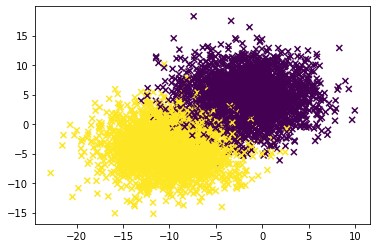

In [4]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], marker="x", c=y)
plt.show()

We can see that the two clusters are not linearily separable, but a linear classification would still yield good results. Your tasks in this notebook are now:

- Add and adapt your regression code (using numpy, not sklearn) from the previous exercise, so that is can predict the class label for each sample.
- Visualize the learned classification with matplotlib
- Calculate the classification accurracy $ \left( \frac{n_{\text{correctly_classified}}}{(n_{\text{correctly_classified}} + n_{\text{incorrectly_classified}})} \right) $
- Bonus: Calculate and plot the classification line that separates the two classes.
- After you have done the iris classification exercise, print out the classification_report using sklearn for this binary classification task. Then, plot the precision-recall curve using [precision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html#sklearn.metrics.precision_recall_curve) and matplotlib
- Bonus: After you have done all the above, write your own code to calculate the metrics shown in classification_report and use that code to generate the precision-recall curve manually.

## Solution

Standard linear regression

In [35]:
import numpy as np
import matplotlib.pyplot as plt
ones = np.ones(X.shape[0])
X_ = np.c_[X, ones]
# calcualte weights and bias
weights = np.matmul(np.matmul(np.linalg.pinv(np.matmul(X_.transpose(), X_)), X_.transpose()), y)
predictions = np.matmul(X_, weights)

Choose threshold for separation: Threshold 0.5 makes sense since it lies in the middle of class 1 and class 0.

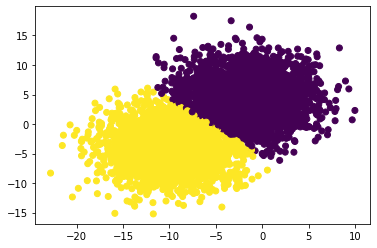

In [57]:
predictions = predictions > 0.5
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=predictions)

Calculate accuracy

In [58]:
acc = np.sum(predictions == y) / y.shape[0]
print("Accuracy: %0.3f" % acc)

Accuracy: 0.959


The separation line consists of all points \\(\mathbf{x}\\) that satisfy: \\(\mathbf{wx} + \mathbf{b} = 0.5\\)

Calculate line as a function \\(x_2 = f(x_1)\\):

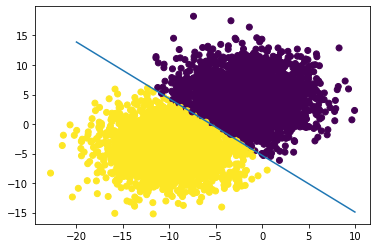

In [59]:
def f(x):
    return (0.5 - weights[-1] - weights[0] * x) / weights[1]

plt.scatter(X[:, 0], X[:, 1], c=predictions)
plt.plot([-20, 10], [f(-20), f(10)])

Classification report:

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2500
           1       0.96      0.96      0.96      2500

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000



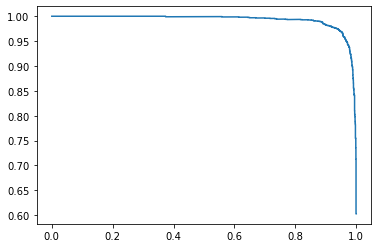

In [61]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y, np.matmul(X_, weights))
plt.plot(recall, precision)

Manually redo metrics:

In [84]:
tp = np.sum(y[predictions])
tn = np.sum(y[np.logical_not(predictions)] == 0)
fp = np.sum(y[predictions] == 0)
fn = np.sum(y[np.logical_not(predictions)])

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * precision * recall / (precision + recall)
print("Precision: %0.2f\nRecall: %0.2f\nf1-score: %0.2f" %(precision, recall, f1))


Precision: 0.96
Recall: 0.96
f1-score: 0.96


Plot precision-recall-curve

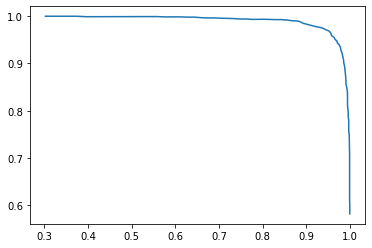

In [89]:
rec = []
pre = []
for thresh in np.arange(0, 1, 0.01):
    p = np.matmul(X_, weights) > thresh
    tp = np.sum(y[p])
    fp = np.sum(y[p] == 0)
    fn = np.sum(y[np.logical_not(p)])
    pre.append(tp / (tp + fp))
    rec.append(tp / (tp + fn))

plt.plot(rec, pre)
    